In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk

In [3]:
df = pd.read_csv('spam.csv')
df.shape

(5572, 5)

<h3 align="center">Data Cleaning</h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 rows
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [20]:
# renaming the col names
df.columns = ['target', 'text']
df.sample(5)

,target,text
3212,ham,What's ur pin?
1321,ham,"I wake up long ago already... Dunno, what othe..."
5214,spam,Natalja (25/F) is inviting you to be her frien...
1022,ham,We still on for tonight?
3107,ham,Hello hun how ru? Its here by the way. Im good...


In [27]:
df.iloc[:, 0] = LabelEncoder().fit_transform(np.array(df.iloc[:, 0]))
df.sample(5)

,target,text
4012,0,Ok.
3950,0,Hi dude hw r u da realy mising u today
118,0,Hmm...my uncle just informed me that he's payi...
114,0,"Wa, ur openin sentence very formal... Anyway, ..."
4696,0,"Okey dokey, i���ll be over in a bit just sorti..."


In [30]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [37]:
#check for duplicate values
df.duplicated().sum()

0

In [39]:
#remove duplicate
df.drop_duplicates(keep='first', inplace=True)
df.shape

(5169, 2)

<h3 align='center'>Exploratory Data Analysis</h3>

In [45]:
# count no of spams and no of hams
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

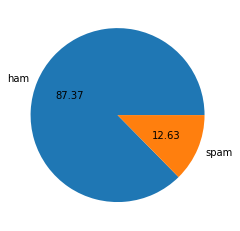

In [52]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [56]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
df['num_characters'] = df['text'].apply(len)
df.sample(5)

,target,text,num_characters
51,0,"A gram usually runs like &lt;#&gt; , a half e...",124
1396,0,Shall i start from hear.,24
62,0,Its a part of checking IQ,25
3541,0,�� come lt 25 n pass to me lar,30
5361,0,Yep get with the program. You're slacking.,42


In [65]:
# no of words column
df['word_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(5)

,target,text,num_characters,word_count
5132,0,it's still not working. And this time i also t...,114,30
1992,1,Free tones Hope you enjoyed your new content. ...,129,20
852,0,No da if you run that it activate the full ver...,54,13
4035,0,How are you holding up?,23,6
2271,0,Life spend with someone for a lifetime may be ...,144,27


In [68]:
df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,target,text,num_characters,word_count,sentence_count
1068,1,Someone U know has asked our dating service 2 ...,134,28,4
3760,0,Was just about to ask. Will keep this one. May...,110,27,3
1472,0,Just sent you an email ��� to an address with ...,74,18,1
3222,0,Well that must be a pain to catch,33,8,1
4828,0,"How long before you get reply, just defer admi...",69,13,1


In [74]:
df[['num_characters', 'word_count', 'sentence_count']].describe()

,num_characters,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456761,1.966531
std,58.174846,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
# statistical analysis for ham messages
df[df['target'] == 0][['num_characters', 'word_count', 'sentence_count']].describe()

,num_characters,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123782,1.820195
std,56.356802,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [78]:
# statistical analysis for spam messages
df[df['target'] == 1][['num_characters', 'word_count', 'sentence_count']].describe()

,num_characters,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

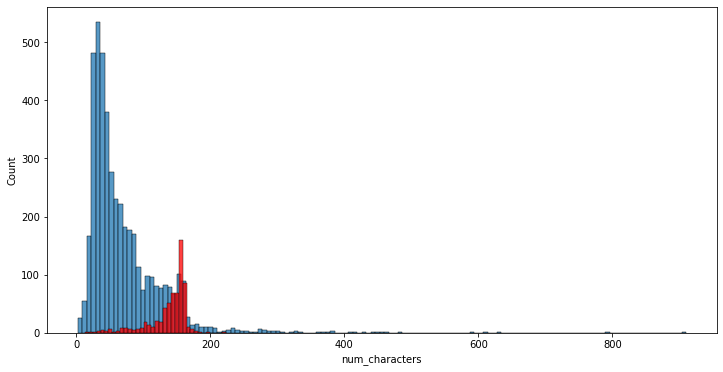

In [86]:
#plot the difference between ham and spam
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='r')

<AxesSubplot:xlabel='word_count', ylabel='Count'>

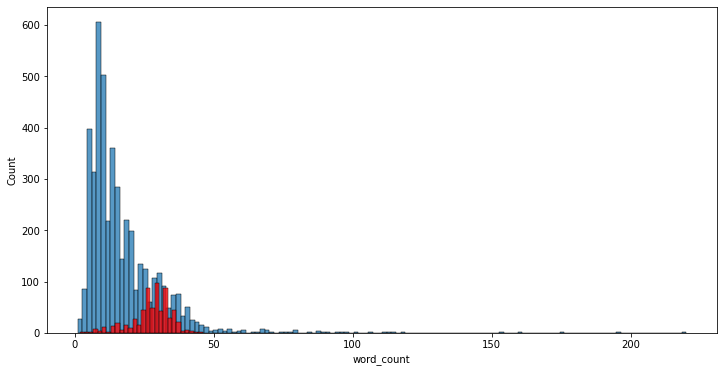

In [88]:
#plot the difference between ham and spam
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['word_count'])
sns.histplot(df[df['target'] == 1]['word_count'], color='r')

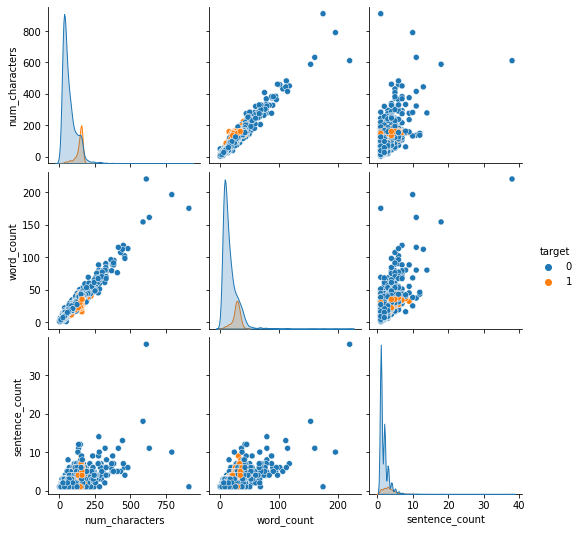

In [94]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

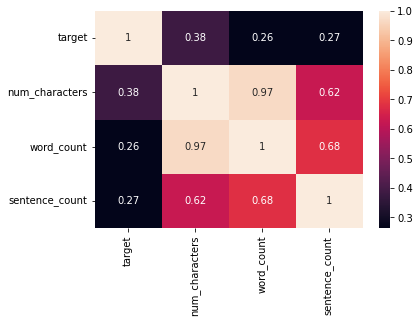

In [98]:
sns.heatmap(df.corr(), annot=True)

# corr for num_characters and target is highest which implies, the tendency for the target to move towards being spam is more when num_characters increases

<h3 align="center">Text Preprocessing</h3>

Steps:
1. Lower Case
2. Tokenization
3. Removing Special Characters
4. Stemming 
<!-- Stemming or Lemmatizing -->
> sort so as to group together inflected or variant forms of the same word
5. Removing Stop words and punctuation
>top words means those words which is used in sentence formation but doesn't have any significance contribution in the overall meaning of the sentence

In [105]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [107]:
from string import punctuation

In [116]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [120]:
def transform_text(text):
    text = text.lower() # step1
    text = nltk.word_tokenize(text) # tokenize
    y = list()
    # removing special Characters
    for i in text:
        if(i.isalnum()):
            y.append(i)
    text = y.copy()
    y.clear()
    # removing stop words
    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            y.append(i)
    text = y.copy()
    y.clear()
    #  stemming
    for i in text:
        y.append(ps.stem(i))
    text = y.copy()
    y.clear()
    return ' '.join(text)

In [124]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [127]:
df['transformed_text'] = df['text'].apply(transform_text)

,target,text,num_characters,word_count,sentence_count,transformed_text
52,0,K fyi x has a ride early tomorrow morning but ...,80,17,1,k fyi x ride earli tomorrow morn crash place t...
3986,1,Ringtone Club: Gr8 new polys direct to your mo...,63,13,1,rington club gr8 new poli direct mobil everi week
2615,0,2marrow only. Wed at &lt;#&gt; to 2 aha.,42,16,2,2marrow wed lt gt 2 aha
3918,0,I wish! I don't think its gonna snow that much...,205,54,5,wish think gon na snow much flurri usual get m...


In [129]:
df.head(4)

,target,text,num_characters,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [138]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white', collocations=False)
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

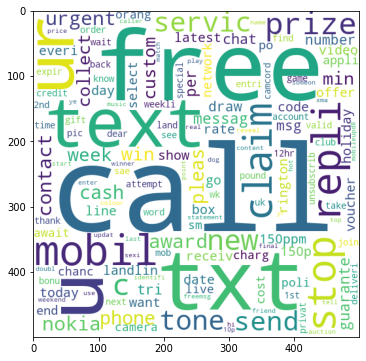

In [141]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)